# HMM Problem 1

In [10]:
%matplotlib inline
from __future__ import division
import scipy
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


from math import sqrt, pi, exp, log

plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['axes.labelsize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = 1.5*plt.rcParams['font.size']

A = np.array([[0.990, 0.005, 0.005], [0.005, 0.990, 0.005], [0.005, 0.005, 0.990]])
pi0 = [1/3, 1/3, 1/3]
Q = [-1, 0, 1]
T = 1000
scale=1
colors = cm.rainbow(np.linspace(0, 1, 6))
scipy.set_printoptions(precision = 4, suppress = True)


In [11]:
def Yt(x):
    return norm.rvs(loc=x, scale=scale, size=1)[0]

def run_hmm():
    starting_state = np.random.choice(Q,p=pi0)
    prev_state = starting_state
    xt = [prev_state]
    yt = [Yt(prev_state)]
    for t in range(1,T):
        next_state = np.random.choice(Q, p=A[xt[t-1]+1,:])
        xt.append(next_state)
        yt.append(Yt(next_state)) 
    return {'xt': xt, 'yt': yt}

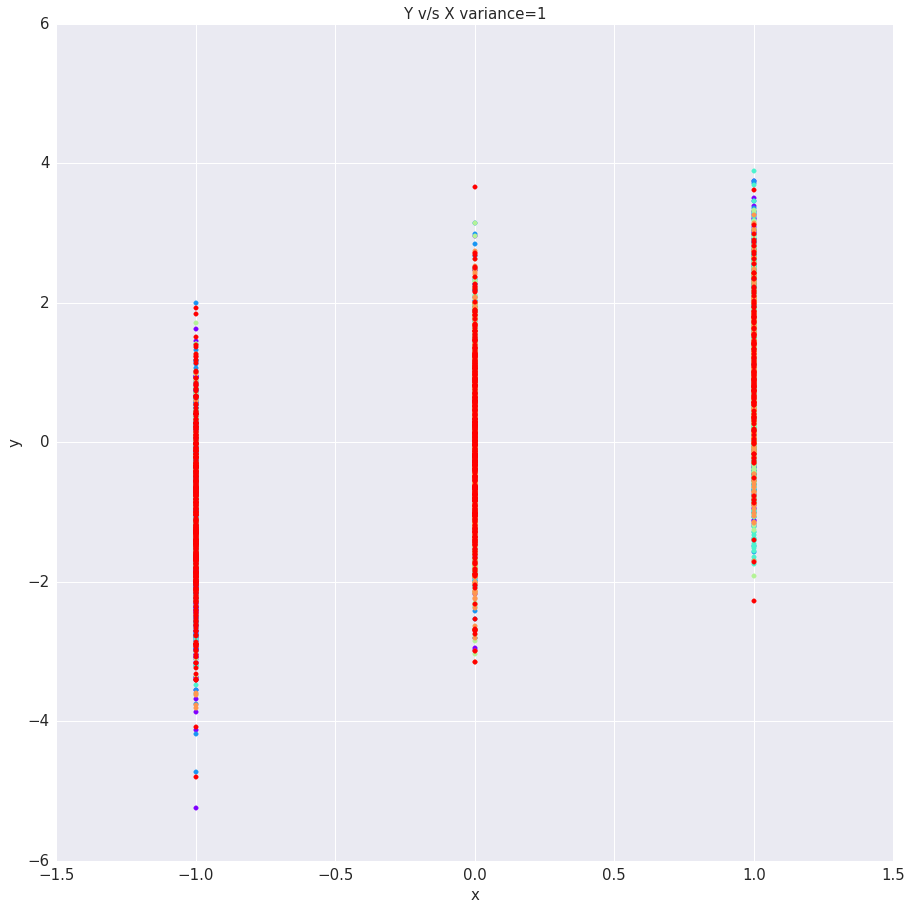

In [12]:
np.random.seed(100)
for i in range(0,6):
    d = run_hmm()
    xt = d['xt']
    yt = d['yt']
    plt.scatter(xt, yt, color=colors[i])
plt.title('Y v/s X variance=1')
plt.xlabel('x')
plt.ylabel('y')

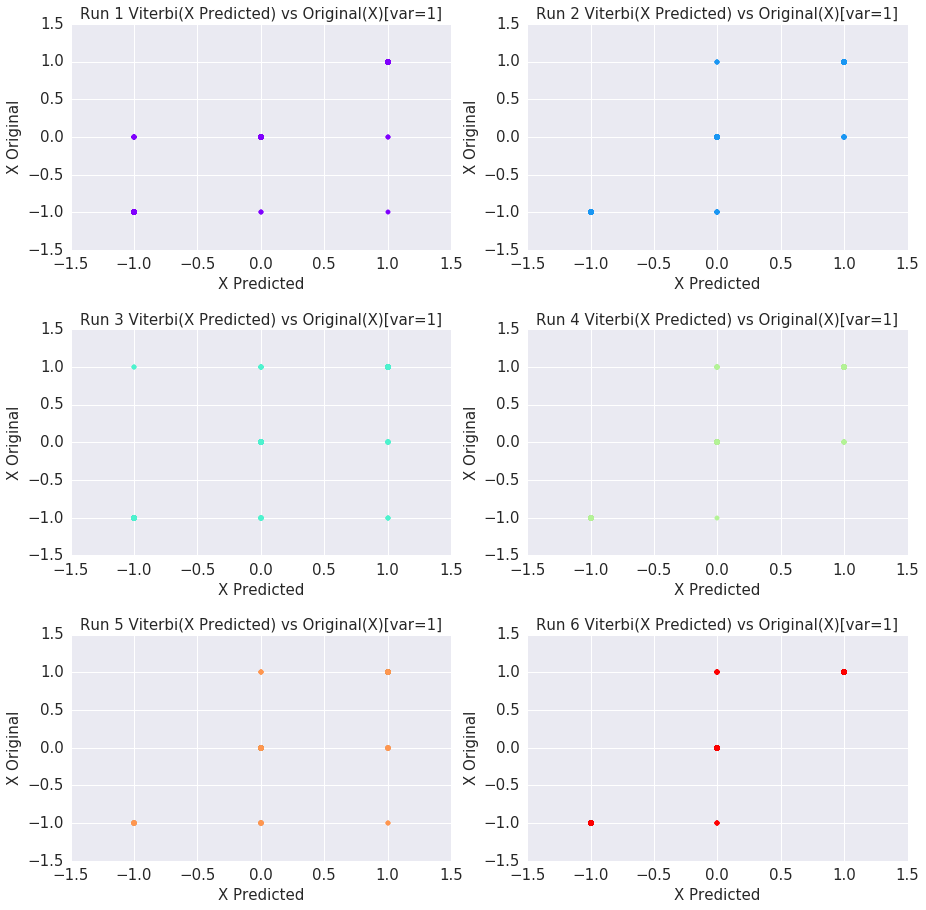

In [13]:
np.random.seed(100)

def b(x,m):
    p = -0.5* log(2*pi*scale) + -(x-m)**2/(2*scale)
    return p

def viterbi(yt):
    delta = [{} for t in range(0,T)]
    path = {}
    for q in Q:
        delta[0][q] = log(pi0[q+1])+(b(yt[0],q)) 
        path[q] = [q]
    for t in range(1,T):
        tempath = {}
        for q in Q:
            (Z, state) =  max(( delta[t-1][x] + b(yt[t],q) + log(A[x+1,q+1]),x) for x in Q)
            delta[t][q] = Z
            tempath[q] = path[state]+[q]
        path = tempath
    (p, state) = max((delta[T-1][q], q) for q in Q)
    return path[state],delta
fig = plt.figure()
np.random.seed(100)
scale = 1
for i in range(0,6):
    d = run_hmm()
    ax = fig.add_subplot(3,2,i+1)
    xt = d['xt']
    yt = d['yt']
    xtp, delta = viterbi(yt)
    plt.scatter(xtp, xt, color=colors[i])
    plt.subplots_adjust(hspace = .35)
    plt.title('Run {} Viterbi(X Predicted) vs Original(X)[var=1]'.format(i+1))
    plt.xlabel("X Predicted")
    plt.ylabel('X Original')

## Check code by keeping the variance at 0.005

### HMM Transition(variance = 0.005)

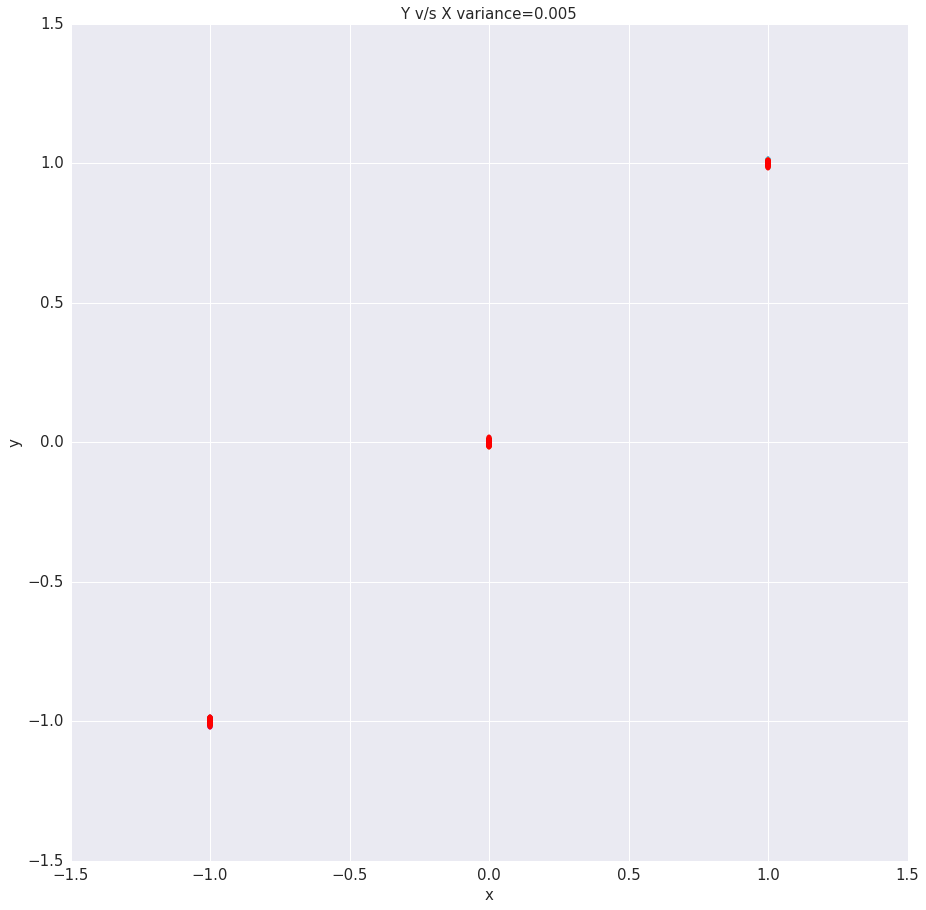

In [14]:
np.random.seed(100)
scale = 0.005
for i in range(0,6):
    d = run_hmm()
    xt = d['xt']
    yt = d['yt']
    plt.scatter(xt, yt, color=colors[i])
plt.title('Y v/s X variance=0.005')
plt.xlabel('x')
plt.ylabel('y')

### Viterbi(variance = 0.005)


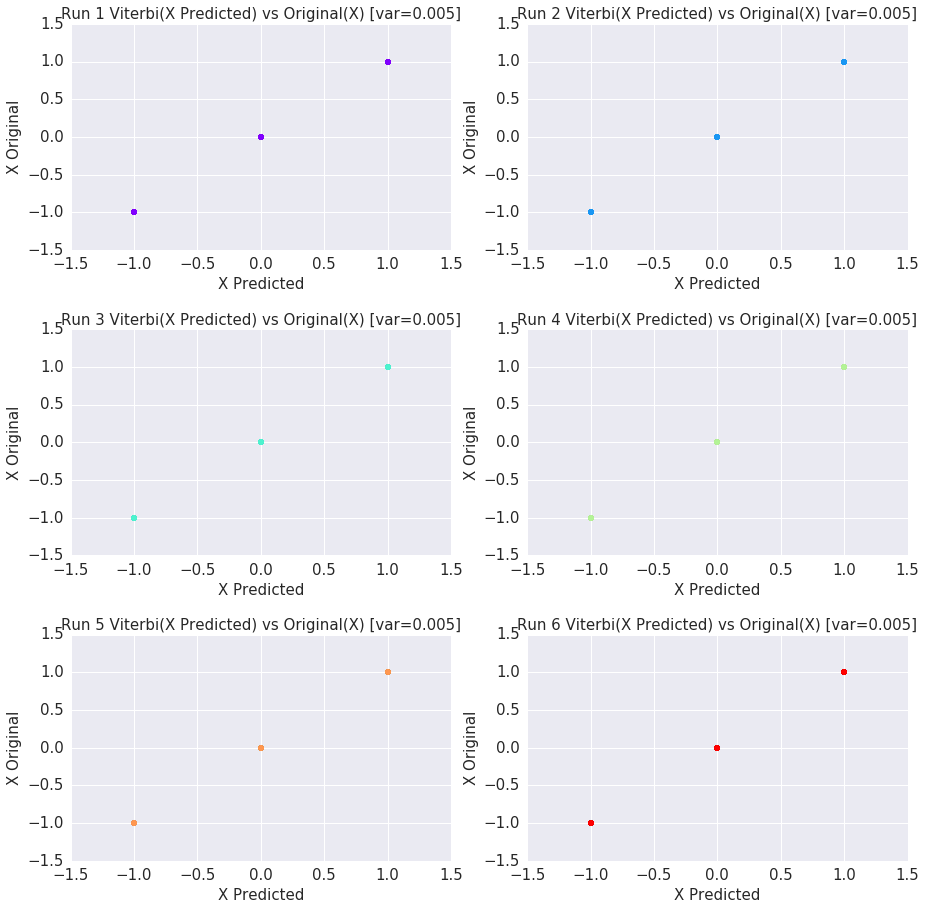

In [15]:
# Check with scale = 0.005
scale = 0.005
fig = plt.figure()
np.random.seed(100)
for i in range(0,6):
    d = run_hmm()
    ax = fig.add_subplot(3,2,i+1)
    xt = d['xt']
    yt = d['yt']
    xtp, delta = viterbi(yt)
    plt.scatter(xtp, xt, color=colors[i])
    plt.subplots_adjust(hspace = .35)
    plt.title('Run {} Viterbi(X Predicted) vs Original(X) [var=0.005]'.format(i+1))
    plt.xlabel("X Predicted")
    plt.ylabel('X Original')